# EDA on World Happiness Report

World Happiness Report is published by United Nation every year with the objective of quantifying the quality of life around the world. It is baseed on surveying a sample of population based on size of population. A Happiness is computed based on paramenters like perception on corruption, social security support, GDP per capita, health care facility, freedom to make choices and generocity. 
The dataset has been downloaded from kaggel.com. We try to explore the data to find any trend, replationship and inferences among the variables incolved. 
This is a projectwork for the course Data Analysis with Python: Zero to Pandas(zerotopandas.com). It equipped me with basic tools such as numpy, pandas, seaborn and matplotlib i order to draw some inferences and answer questions related to any data set. 

## Downloading the Dataset

Data has been downloaded from kaggel.com which is a online community for python programmers. It has huge collection of data which can be directly imported into python notebook. 
The data set has been downloaded from the website by installing the module opendatasets and by calling download function which takes the url of the page containing data. This module only works with data seet from kaggel.com.

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
dataset_url = 'https://www.kaggle.com/mathurinache/world-happiness-report' 

In case you want to run this program you have to remove the hasttages in the cell below in order to download the necessary files.

In [3]:
#import opendatasets as od #library to download dataset
#od.download(dataset_url)  # function to import and download dataset

The dataset has been downloaded and extracted.

In [4]:
data_dir = './world-happiness-report' #path to directory of dataset. 

In [5]:
import os
os.listdir(data_dir)  #listing file in the directory

['2018.csv', '2016.csv', '2017.csv', '2015.csv', '2020.csv', '2019.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "eda-happiness-index" 

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

In [9]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "ashish6552/eda-happiness-index" on https://jovian.ai
[jovian] Uploading notebook..


[jovian] Error: Looks like the notebook is missing output cells, please save the notebook and try jovian.commit again.


[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/ashish6552/eda-happiness-index


'https://jovian.ai/ashish6552/eda-happiness-index'

## Data Preparation and Cleaning

"There is no such thing as perfect dataset, you have to create one." said by famous Wes Mckinney creator of pandas library. We will check for inapporiate value, missing values, data type, naming and merging in order to transform the dataset for flawless analysis. It makes inferences and conclusion from the data consistent and reliable. 



In [10]:
import pandas as pd
import numpy as np

In [11]:
happy2020_raw_df = pd.read_csv(data_dir+'/2020.csv') 
#pandas function to read data and converting into a dataframe.
# We download data set for 2020. 

In [12]:
happy2020_raw_df.info()
#It shows each names of columns with the number of values and data type.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                153 non-null    object 
 1   Regional indicator                          153 non-null    object 
 2   Ladder score                                153 non-null    float64
 3   Standard error of ladder score              153 non-null    float64
 4   upperwhisker                                153 non-null    float64
 5   lowerwhisker                                153 non-null    float64
 6   Logged GDP per capita                       153 non-null    float64
 7   Social support                              153 non-null    float64
 8   Healthy life expectancy                     153 non-null    float64
 9   Freedom to make life choices                153 non-null    float64
 10  Generosity    

It seems like all the columns have appropriate data typr and there is no missing value. 

In [13]:
#happy2020_raw_df 
#Dataframe in  before cleaning. 

In [14]:
happy2020_raw_df.describe() 
#Describe function gives some details about the dataset.

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,153.00000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,1.530000e+02,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,5.47324,0.053538,5.578175,5.368304,9.295706,0.808721,64.445529,0.783360,-0.014568,0.733120,1.972317e+00,0.868771,1.155607,0.692869,0.463583,0.189375,0.130718,1.972317
std,1.11227,0.018183,1.096823,1.128631,1.201588,0.121453,7.057848,0.117786,0.151809,0.175172,1.336643e-15,0.372416,0.286866,0.254094,0.141172,0.100401,0.113097,0.563638
min,2.56690,0.025902,2.628270,2.505530,6.492642,0.319460,45.200001,0.396573,-0.300907,0.109784,1.972317e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.257241
25%,4.72410,0.040698,4.826248,4.603149,8.350645,0.737217,58.961712,0.714839,-0.127015,0.683019,1.972317e+00,0.575862,0.986718,0.495443,0.381457,0.115006,0.055805,1.629928
50%,5.51500,0.050606,5.607728,5.430644,9.456313,0.829204,66.305145,0.799805,-0.033665,0.783122,1.972317e+00,0.918549,1.203987,0.759818,0.483293,0.176745,0.098435,2.046272
75%,6.22850,0.060677,6.363886,6.138881,10.265124,0.906747,69.289192,0.877709,0.085429,0.849151,1.972317e+00,1.169229,1.387139,0.867249,0.576665,0.255510,0.163064,2.350267
max,7.80870,0.120590,7.869766,7.747634,11.450681,0.974670,76.804581,0.974998,0.560664,0.935585,1.972317e+00,1.536676,1.547567,1.137814,0.693270,0.569814,0.533162,3.440810


In [15]:
# As we can see minimum value of genoricity is negative which is not in the range. It cannot be negative so 
# we assume it as entry error and convert all negative values in positive using absolute function.
happy2020_raw_df['Generosity']= happy2020_raw_df.Generosity.abs()


In [16]:
#Logged of GDP per capita is used in the data to shorten the range over countried. 
# To make it comparable with data from previous years we divide by 10.
happy2020_raw_df['Logged GDP per capita']=happy2020_raw_df['Logged GDP per capita']/10

In [17]:
# We will add a column showing rank associated with each country.
happy2020_raw_df['Rank']=happy2020_raw_df['Ladder score'].rank(ascending=False)
happy2020_raw_df.columns # To list name of all columns. 
# Here we cann check if the new column has been added. 

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual', 'Rank'],
      dtype='object')

In [18]:
# Lets change column names for convenience and to make it same for data set from other years.
# We have used remane() function to change name of columns.
happy2020_raw_df.rename(columns={'Ladder score' : 'Happiness Index',
                                'Healthy life expectancy':'Life Expectancy',
                                'Freedom to make life choices': 'Freedom Index',
                                'Perceptions of corruption': 'Corruption Index'},
                        inplace=True)

In [19]:
# List containing column order according to which we want to arange the dataset. 
column_order=['Rank', 'Country name', 'Regional indicator','Happiness Index','Logged GDP per capita',
              'Social support','Life Expectancy',
              'Freedom Index', 'Generosity', 'Corruption Index', 'Year',]

In [20]:
# Using reindex() for changing the order of column into a new dataframe
happy2020_df=happy2020_raw_df.reindex(columns=column_order)

In [21]:
# Adding column containing year.

happy2020_df['Year']=2020

In [22]:
# Finally viewing the final dataset.
happy2020_df


,Rank,Country name,Regional indicator,Happiness Index,Logged GDP per capita,Social support,Life Expectancy,Freedom Index,Generosity,Corruption Index,Year
0,1.0,Finland,Western Europe,7.8087,1.063927,0.954330,71.900825,0.949172,0.059482,0.195445,2020
1,2.0,Denmark,Western Europe,7.6456,1.077400,0.955991,72.402504,0.951444,0.066202,0.168489,2020
2,3.0,Switzerland,Western Europe,7.5599,1.097993,0.942847,74.102448,0.921337,0.105911,0.303728,2020
3,4.0,Iceland,Western Europe,7.5045,1.077256,0.974670,73.000000,0.948892,0.246944,0.711710,2020
4,5.0,Norway,Western Europe,7.4880,1.108780,0.952487,73.200783,0.955750,0.134533,0.263218,2020
...,...,...,...,...,...,...,...,...,...,...,...
148,149.0,Central African Republic,Sub-Saharan Africa,3.4759,0.662516,0.319460,45.200001,0.640881,0.082410,0.891807,2020
149,150.0,Rwanda,Sub-Saharan Africa,3.3123,0.760010,0.540835,61.098846,0.900589,0.055484,0.183541,2020
150,151.0,Zimbabwe,Sub-Saharan Africa,3.2992,0.786571,0.763093,55.617260,0.711458,0.072064,0.810237,2020
151,152.0,South Sudan,Sub-Saharan Africa,2.8166,0.742536,0.553707,51.000000,0.451314,0.016519,0.763417,2020


In [23]:
happy2020_df.describe()

,Rank,Happiness Index,Logged GDP per capita,Social support,Life Expectancy,Freedom Index,Generosity,Corruption Index,Year
count,153.000000,153.00000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.0
mean,77.000000,5.47324,0.929571,0.808721,64.445529,0.783360,0.122070,0.733120,2020.0
std,44.311398,1.11227,0.120159,0.121453,7.057848,0.117786,0.090886,0.175172,0.0
min,1.000000,2.56690,0.649264,0.319460,45.200001,0.396573,0.000227,0.109784,2020.0
25%,39.000000,4.72410,0.835065,0.737217,58.961712,0.714839,0.055484,0.683019,2020.0
50%,77.000000,5.51500,0.945631,0.829204,66.305145,0.799805,0.105911,0.783122,2020.0
75%,115.000000,6.22850,1.026512,0.906747,69.289192,0.877709,0.168695,0.849151,2020.0
max,153.000000,7.80870,1.145068,0.974670,76.804581,0.974998,0.560664,0.935585,2020.0


In [24]:
# making a new dataframe from an existing dataframe containing name of country and 
# region associated with it. 
country_conti_df=happy2020_df[['Country name', 'Regional indicator']]

country_conti_df

,Country name,Regional indicator
0,Finland,Western Europe
1,Denmark,Western Europe
2,Switzerland,Western Europe
3,Iceland,Western Europe
4,Norway,Western Europe
...,...,...
148,Central African Republic,Sub-Saharan Africa
149,Rwanda,Sub-Saharan Africa
150,Zimbabwe,Sub-Saharan Africa
151,South Sudan,Sub-Saharan Africa


In [25]:
# Reading data from 2019
happy2019_df = pd.read_csv(data_dir+'/2019.csv')
#happy2019_df

In [26]:
happy2019_df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [27]:
# It seems like few values have zero as their minimum value which is not apporiate 
# according to the nature of variable. So we replace all zero entries into nan. 
happy2019_df=happy2019_df.replace(0,np.nan)
#happy2019_df.describe()

In [28]:
happy2019_df.rename(columns={   'Score' : 'Happiness Index',
                                'Healthy life expectancy':'Life Expectancy',
                                'Freedom to make life choices': 'Freedom Index',
                                'Perceptions of corruption': 'Corruption Index',
                            'Overall rank':'Rank',
                            'Country or region':'Country name',
                            'GDP per capita':'Logged GDP per capita',
                             'Regional indicator_x': 'Regional indicator'
                            }, inplace=True)

In [29]:
happy2019_df['Year']=2019

In [30]:
# Merging dataframes to add a column containing region associated with each country.
happy2019_df=happy2019_df.merge(country_conti_df, on='Country name')

In [31]:
happy2019_df=happy2019_df.reindex(columns=column_order)

In [32]:
happy2019_df.describe()

,Rank,Happiness Index,Logged GDP per capita,Social support,Life Expectancy,Freedom Index,Generosity,Corruption Index,Year
count,147.000000,147.000000,147.000000,146.000000,146.000000,146.000000,146.000000,146.000000,147.0
mean,78.727891,5.407218,0.896626,1.220103,0.728260,0.394623,0.182267,0.108993,2019.0
std,45.545635,1.125270,0.391128,0.278986,0.233811,0.139192,0.094771,0.094367,0.0
min,1.000000,2.853000,0.026000,0.437000,0.105000,0.010000,0.025000,0.004000,2019.0
25%,40.500000,4.526500,0.576000,1.056500,0.552000,0.306000,0.107250,0.047750,2019.0
50%,79.000000,5.373000,0.960000,1.267500,0.789000,0.416500,0.175000,0.083500,2019.0
75%,118.500000,6.178000,1.213500,1.454750,0.881000,0.507750,0.246750,0.134250,2019.0
max,156.000000,7.769000,1.609000,1.624000,1.141000,0.631000,0.566000,0.453000,2019.0


In [33]:
happy2019_df

,Rank,Country name,Regional indicator,Happiness Index,Logged GDP per capita,Social support,Life Expectancy,Freedom Index,Generosity,Corruption Index,Year
0,1,Finland,Western Europe,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019
1,2,Denmark,Western Europe,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019
2,3,Norway,Western Europe,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019
3,4,Iceland,Western Europe,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019
4,5,Netherlands,Western Europe,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019
...,...,...,...,...,...,...,...,...,...,...,...
142,152,Rwanda,Sub-Saharan Africa,3.334,0.359,0.711,0.614,0.555,0.217,0.411,2019
143,153,Tanzania,Sub-Saharan Africa,3.231,0.476,0.885,0.499,0.417,0.276,0.147,2019
144,154,Afghanistan,South Asia,3.203,0.350,0.517,0.361,NaN,0.158,0.025,2019
145,155,Central African Republic,Sub-Saharan Africa,3.083,0.026,NaN,0.105,0.225,0.235,0.035,2019


In [34]:
# Importing dataset for 2018 into dataframe
happy2018_df = pd.read_csv(data_dir+'/2018.csv')
#happy2018_df

In [35]:
happy2018_df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000
mean,78.500000,5.375917,0.891449,1.213237,0.597346,0.454506,0.181006,0.112000
std,45.177428,1.119506,0.391921,0.302372,0.247579,0.162424,0.098471,0.096492
min,1.000000,2.905000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.453750,0.616250,1.066750,0.422250,0.356000,0.109500,0.051000
50%,78.500000,5.378000,0.949500,1.255000,0.644000,0.487000,0.174000,0.082000
75%,117.250000,6.168500,1.197750,1.463000,0.777250,0.578500,0.239000,0.137000
max,156.000000,7.632000,2.096000,1.644000,1.030000,0.724000,0.598000,0.457000


In [36]:
# It seems like few values have zero as their minimum value which is not apporiate 
# according to the nature of variable. So we replace all zero entries into nan. 
happy2018_df=happy2018_df.replace(0,np.nan)
#happy2018_df.describe()

In [37]:
happy2018_df.rename(columns={   'Score' : 'Happiness Index',
                                'Healthy life expectancy':'Life Expectancy',
                                'Freedom to make life choices': 'Freedom Index',
                                'Perceptions of corruption': 'Corruption Index',
                            'Overall rank':'Rank',
                            'Country or region':'Country name',
                            'GDP per capita':'Logged GDP per capita',
                            }, inplace=True)

In [38]:
happy2018_df['Year']= 2018

In [39]:
happy2018_df=happy2018_df.merge(country_conti_df, on='Country name')
#happy2018_df

In [40]:
happy2018_df=happy2018_df.reindex(columns=column_order)

In [41]:
happy2018_df.describe()

,Rank,Happiness Index,Logged GDP per capita,Social support,Life Expectancy,Freedom Index,Generosity,Corruption Index,Year
count,145.000000,145.000000,145.000000,144.000000,144.000000,145.000000,144.000000,142.000000,145.0
mean,78.227586,5.385897,0.886676,1.226653,0.603069,0.457414,0.179583,0.111394,2018.0
std,45.276887,1.127206,0.386933,0.284251,0.241183,0.154060,0.097939,0.096909,0.0
min,1.000000,2.905000,0.024000,0.372000,0.010000,0.025000,0.026000,0.001000,2018.0
25%,40.000000,4.456000,0.592000,1.066750,0.427750,0.356000,0.107500,0.051000,2018.0
50%,79.000000,5.358000,0.959000,1.261500,0.661500,0.479000,0.172500,0.081500,2018.0
75%,117.000000,6.167000,1.176000,1.468250,0.777250,0.578000,0.232000,0.133750,2018.0
max,156.000000,7.632000,2.096000,1.644000,1.008000,0.724000,0.598000,0.457000,2018.0


In [42]:
happy2018_df

,Rank,Country name,Regional indicator,Happiness Index,Logged GDP per capita,Social support,Life Expectancy,Freedom Index,Generosity,Corruption Index,Year
0,1,Finland,Western Europe,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2018
1,2,Norway,Western Europe,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2018
2,3,Denmark,Western Europe,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2018
3,4,Iceland,Western Europe,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2018
4,5,Switzerland,Western Europe,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2018
...,...,...,...,...,...,...,...,...,...,...,...
140,152,Yemen,Middle East and North Africa,3.355,0.442,1.073,0.343,0.244,0.083,0.064,2018
141,153,Tanzania,Sub-Saharan Africa,3.303,0.455,0.991,0.381,0.481,0.270,0.097,2018
142,154,South Sudan,Sub-Saharan Africa,3.254,0.337,0.608,0.177,0.112,0.224,0.106,2018
143,155,Central African Republic,Sub-Saharan Africa,3.083,0.024,NaN,0.010,0.305,0.218,0.038,2018


In [43]:
# Dataset for 2017
happy2017_df = pd.read_csv(data_dir+'/2017.csv')
#happy2017_df

In [44]:
happy2017_df.describe()

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


In [45]:
# It seems like few values have zero as their minimum value which is not apporiate 
# according to the nature of variable. So we replace all zero entries into nan. 
happy2017_df=happy2017_df.replace(0,np.nan)
#happy2017_df.describe()

In [46]:
happy2017_df.rename(columns={   'Happiness.Score' : 'Happiness Index',
                                'Health..Life.Expectancy.':'Life Expectancy',
                                'Freedom': 'Freedom Index',
                                'Trust..Government.Corruption.': 'Corruption Index',
                            'Happiness.Rank':'Rank',
                            'Country':'Country name',
                            'Economy..GDP.per.Capita.':'Logged GDP per capita',
                             'Family':'Social support',
                            }, inplace=True)

In [47]:
happy2017_df['Year']=2017

In [48]:
#happy2017_df

In [49]:
happy2017_df=happy2017_df.merge(country_conti_df, on='Country name')


In [50]:
happy2017_df=happy2017_df.reindex(columns=column_order)

In [51]:
happy2017_df.describe()

,Rank,Happiness Index,Logged GDP per capita,Social support,Life Expectancy,Freedom Index,Generosity,Corruption Index,Year
count,147.000000,147.000000,146.000000,146.000000,146.000000,147.000000,146.000000,146.000000,147.0
mean,77.020408,5.377633,0.993820,1.204691,0.560981,0.411694,0.245085,0.119775,2017.0
std,44.941129,1.134529,0.407463,0.267246,0.229432,0.141524,0.133182,0.098691,0.0
min,1.000000,2.693000,0.091623,0.431883,0.005565,0.030370,0.010165,0.004388,2017.0
25%,38.500000,4.524500,0.679481,1.049448,0.398654,0.308012,0.153590,0.056843,2017.0
50%,77.000000,5.293000,1.072805,1.256887,0.616848,0.437454,0.231225,0.087969,2017.0
75%,115.500000,6.136500,1.319453,1.424324,0.730069,0.511341,0.319067,0.146307,2017.0
max,155.000000,7.537000,1.741944,1.610574,0.949492,0.658249,0.838075,0.464308,2017.0


In [52]:
happy2017_df

,Rank,Country name,Regional indicator,Happiness Index,Logged GDP per capita,Social support,Life Expectancy,Freedom Index,Generosity,Corruption Index,Year
0,1,Norway,Western Europe,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2017
1,2,Denmark,Western Europe,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2017
2,3,Iceland,Western Europe,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2017
3,4,Switzerland,Western Europe,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2017
4,5,Finland,Western Europe,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2017
...,...,...,...,...,...,...,...,...,...,...,...
142,150,Togo,Sub-Saharan Africa,3.495,0.305445,0.431883,0.247106,0.380426,0.196896,0.095665,2017
143,151,Rwanda,Sub-Saharan Africa,3.471,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,2017
144,153,Tanzania,Sub-Saharan Africa,3.349,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,2017
145,154,Burundi,Sub-Saharan Africa,2.905,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,2017


In [53]:
# Dataset for 2016
happy2016_df = pd.read_csv(data_dir+'/2016.csv')
#happy2016_df

In [54]:
happy2016_df.describe()

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


In [55]:
# It seems like few values have zero as their minimum value which is not apporiate 
# according to the nature of variable. So we replace all zero entries into nan. 
happy2016_df=happy2016_df.replace(0,np.nan)
#happy2016_df.describe()

In [56]:
happy2016_df.rename(columns={   'Happiness Score' : 'Happiness Index',
                                'Health (Life Expectancy)':'Life Expectancy',
                                'Freedom': 'Freedom Index',
                                'Trust (Government Corruption)': 'Corruption Index',
                            'Happiness Rank':'Rank',
                            'Country':'Country name',
                            'Economy (GDP per Capita)':'Logged GDP per capita',
                             'Family':'Social support',
                             'Region':'Regional indicator',
                            }, inplace=True)

In [57]:
happy2016_df.drop(columns='Regional indicator', inplace=True)

In [58]:
#happy2016_df

In [59]:
happy2016_df=happy2016_df.merge(country_conti_df, on='Country name')

In [60]:
#happy2016_df

In [61]:
happy2016_df=happy2016_df.reindex(columns=column_order)

In [62]:
happy2016_df['Year']=2016

In [63]:
happy2016_df.describe()

,Rank,Happiness Index,Logged GDP per capita,Social support,Life Expectancy,Freedom Index,Generosity,Corruption Index,Year
count,145.000000,145.000000,145.000000,144.000000,144.000000,145.000000,144.000000,144.000000,145.0
mean,79.041379,5.384552,0.954213,0.803760,0.565397,0.371565,0.239100,0.133249,2016.0
std,45.582172,1.143058,0.404275,0.260037,0.221328,0.139159,0.131728,0.107627,0.0
min,1.000000,2.905000,0.056610,0.104190,0.038240,0.043200,0.020250,0.003220,2016.0
25%,41.000000,4.404000,0.670240,0.640780,0.401995,0.257480,0.148900,0.058115,2016.0
50%,80.000000,5.303000,1.027870,0.848060,0.610635,0.392370,0.218690,0.103660,2016.0
75%,118.000000,6.239000,1.276070,1.029698,0.729965,0.481630,0.305810,0.174813,2016.0
max,157.000000,7.526000,1.697520,1.183260,0.947190,0.608480,0.819710,0.505210,2016.0


In [64]:
happy2016_df

,Rank,Country name,Regional indicator,Happiness Index,Logged GDP per capita,Social support,Life Expectancy,Freedom Index,Generosity,Corruption Index,Year
0,1,Denmark,Western Europe,7.526,1.44178,1.16374,0.79504,0.57941,0.36171,0.44453,2016
1,2,Switzerland,Western Europe,7.509,1.52733,1.14524,0.86303,0.58557,0.28083,0.41203,2016
2,3,Iceland,Western Europe,7.501,1.42666,1.18326,0.86733,0.56624,0.47678,0.14975,2016
3,4,Norway,Western Europe,7.498,1.57744,1.12690,0.79579,0.59609,0.37895,0.35776,2016
4,5,Finland,Western Europe,7.413,1.40598,1.13464,0.81091,0.57104,0.25492,0.41004,2016
...,...,...,...,...,...,...,...,...,...,...,...
140,152,Rwanda,Sub-Saharan Africa,3.515,0.32846,0.61586,0.31865,0.54320,0.23552,0.50521,2016
141,153,Benin,Sub-Saharan Africa,3.484,0.39499,0.10419,0.21028,0.39747,0.20180,0.06681,2016
142,154,Afghanistan,South Asia,3.360,0.38227,0.11037,0.17344,0.16430,0.31268,0.07112,2016
143,155,Togo,Sub-Saharan Africa,3.303,0.28123,NaN,0.24811,0.34678,0.17517,0.11587,2016


In [65]:
# Importing odataset for 2015
happy2015_df = pd.read_csv(data_dir+'/2015.csv')
#happy2015_df

In [66]:
happy2015_df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [67]:
# It seems like few values have zero as their minimum value which is not apporiate 
# according to the nature of variable. So we replace all zero entries into nan. 
happy2015_df=happy2015_df.replace(0,np.nan)
#happy2015_df.describe()

In [68]:
happy2015_df.rename(columns={   'Happiness Score' : 'Happiness Index',
                                'Health (Life Expectancy)':'Life Expectancy',
                                'Freedom': 'Freedom Index',
                                'Trust (Government Corruption)': 'Corruption Index',
                            'Happiness Rank':'Rank',
                            'Country':'Country name',
                            'Economy (GDP per Capita)':'Logged GDP per capita',
                             'Family':'Social support',
                             'Region':'Regional indicator',
                            }, inplace=True)

In [69]:
happy2015_df.drop(columns='Regional indicator', inplace=True)

In [70]:
happy2015_df=happy2015_df.merge(country_conti_df, on='Country name')

In [71]:
#happy2015_df

In [72]:
happy2015_df=happy2015_df.reindex(columns=column_order)

In [73]:
happy2015_df['Year']= 2015

In [74]:
happy2015_df.describe()

,Rank,Happiness Index,Logged GDP per capita,Social support,Life Expectancy,Freedom Index,Generosity,Corruption Index,Year
count,147.000000,147.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,147.0
mean,79.272109,5.384986,0.846751,1.002203,0.636239,0.431766,0.234131,0.136869,2015.0
std,45.813284,1.144448,0.394435,0.264721,0.242493,0.142306,0.123766,0.114806,0.0
min,1.000000,2.839000,0.015300,0.139950,0.047760,0.076990,0.001990,0.002270,2015.0
25%,41.500000,4.541500,0.557532,0.857845,0.471023,0.329603,0.146760,0.059275,2015.0
50%,80.000000,5.212000,0.918560,1.033960,0.697535,0.434635,0.215860,0.104825,2015.0
75%,118.000000,6.149000,1.153480,1.225993,0.812837,0.545160,0.299420,0.174415,2015.0
max,158.000000,7.587000,1.563910,1.402230,1.025250,0.669730,0.795880,0.551910,2015.0


In [75]:
happy2015_df

,Rank,Country name,Regional indicator,Happiness Index,Logged GDP per capita,Social support,Life Expectancy,Freedom Index,Generosity,Corruption Index,Year
0,1,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015
1,2,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015
2,3,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015
3,4,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015
4,5,Canada,North America and ANZ,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015
...,...,...,...,...,...,...,...,...,...,...,...
142,153,Afghanistan,South Asia,3.575,0.31982,0.30285,0.30335,0.23414,0.36510,0.09719,2015
143,154,Rwanda,Sub-Saharan Africa,3.465,0.22208,0.77370,0.42864,0.59201,0.22628,0.55191,2015
144,155,Benin,Sub-Saharan Africa,3.340,0.28665,0.35386,0.31910,0.48450,0.18260,0.08010,2015
145,157,Burundi,Sub-Saharan Africa,2.905,0.01530,0.41587,0.22396,0.11850,0.19727,0.10062,2015


In [76]:
# Combining data set into ine dataset
happy_df=pd.concat([happy2020_df, happy2019_df, happy2018_df,happy2017_df,happy2016_df,happy2015_df])

In [77]:
# Reseting the index. 
happy_df=happy_df.reset_index()

In [78]:
happy_df.describe()

,index,Rank,Happiness Index,Logged GDP per capita,Social support,Life Expectancy,Freedom Index,Generosity,Corruption Index,Year
count,884.000000,884.000000,884.000000,882.000000,879.000000,879.000000,882.000000,879.000000,877.000000,884.000000
mean,73.191176,78.204751,5.402813,0.918005,1.042611,11.728720,0.477583,0.199708,0.228684,2017.519231
std,42.597708,45.121654,1.128329,0.366376,0.311884,24.392803,0.199115,0.121335,0.260642,1.717498
min,0.000000,1.000000,2.566900,0.015300,0.104190,0.005565,0.010000,0.000227,0.001000,2015.000000
25%,36.000000,39.750000,4.542500,0.694073,0.823104,0.524585,0.343505,0.110765,0.060478,2016.000000
50%,73.000000,78.500000,5.350250,0.968815,1.035160,0.712733,0.465965,0.185306,0.109000,2018.000000
75%,110.000000,117.000000,6.198250,1.169503,1.285063,0.896335,0.590442,0.260500,0.287372,2019.000000
max,152.000000,158.000000,7.808700,2.096000,1.644000,76.804581,0.974998,0.838075,0.935585,2020.000000


In [79]:
# Will display the entire data set
#pd.set_option('display.max_rows', None)


In [80]:
happy_df

,index,Rank,Country name,Regional indicator,Happiness Index,Logged GDP per capita,Social support,Life Expectancy,Freedom Index,Generosity,Corruption Index,Year
0,0,1.0,Finland,Western Europe,7.8087,1.063927,0.954330,71.900825,0.949172,0.059482,0.195445,2020
1,1,2.0,Denmark,Western Europe,7.6456,1.077400,0.955991,72.402504,0.951444,0.066202,0.168489,2020
2,2,3.0,Switzerland,Western Europe,7.5599,1.097993,0.942847,74.102448,0.921337,0.105911,0.303728,2020
3,3,4.0,Iceland,Western Europe,7.5045,1.077256,0.974670,73.000000,0.948892,0.246944,0.711710,2020
4,4,5.0,Norway,Western Europe,7.4880,1.108780,0.952487,73.200783,0.955750,0.134533,0.263218,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
879,142,153.0,Afghanistan,South Asia,3.5750,0.319820,0.302850,0.303350,0.234140,0.365100,0.097190,2015
880,143,154.0,Rwanda,Sub-Saharan Africa,3.4650,0.222080,0.773700,0.428640,0.592010,0.226280,0.551910,2015
881,144,155.0,Benin,Sub-Saharan Africa,3.3400,0.286650,0.353860,0.319100,0.484500,0.182600,0.080100,2015
882,145,157.0,Burundi,Sub-Saharan Africa,2.9050,0.015300,0.415870,0.223960,0.118500,0.197270,0.100620,2015


In [81]:
# Ressting to previous setting of dispay
#pd.reset_option('all')

In [82]:
#happy_df

In [83]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "ashish6552/eda-happiness-index" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/ashish6552/eda-happiness-index


'https://jovian.ai/ashish6552/eda-happiness-index'

## Exploratory Analysis and Visualization


Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [84]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Happiest and Saddest countries for each year.

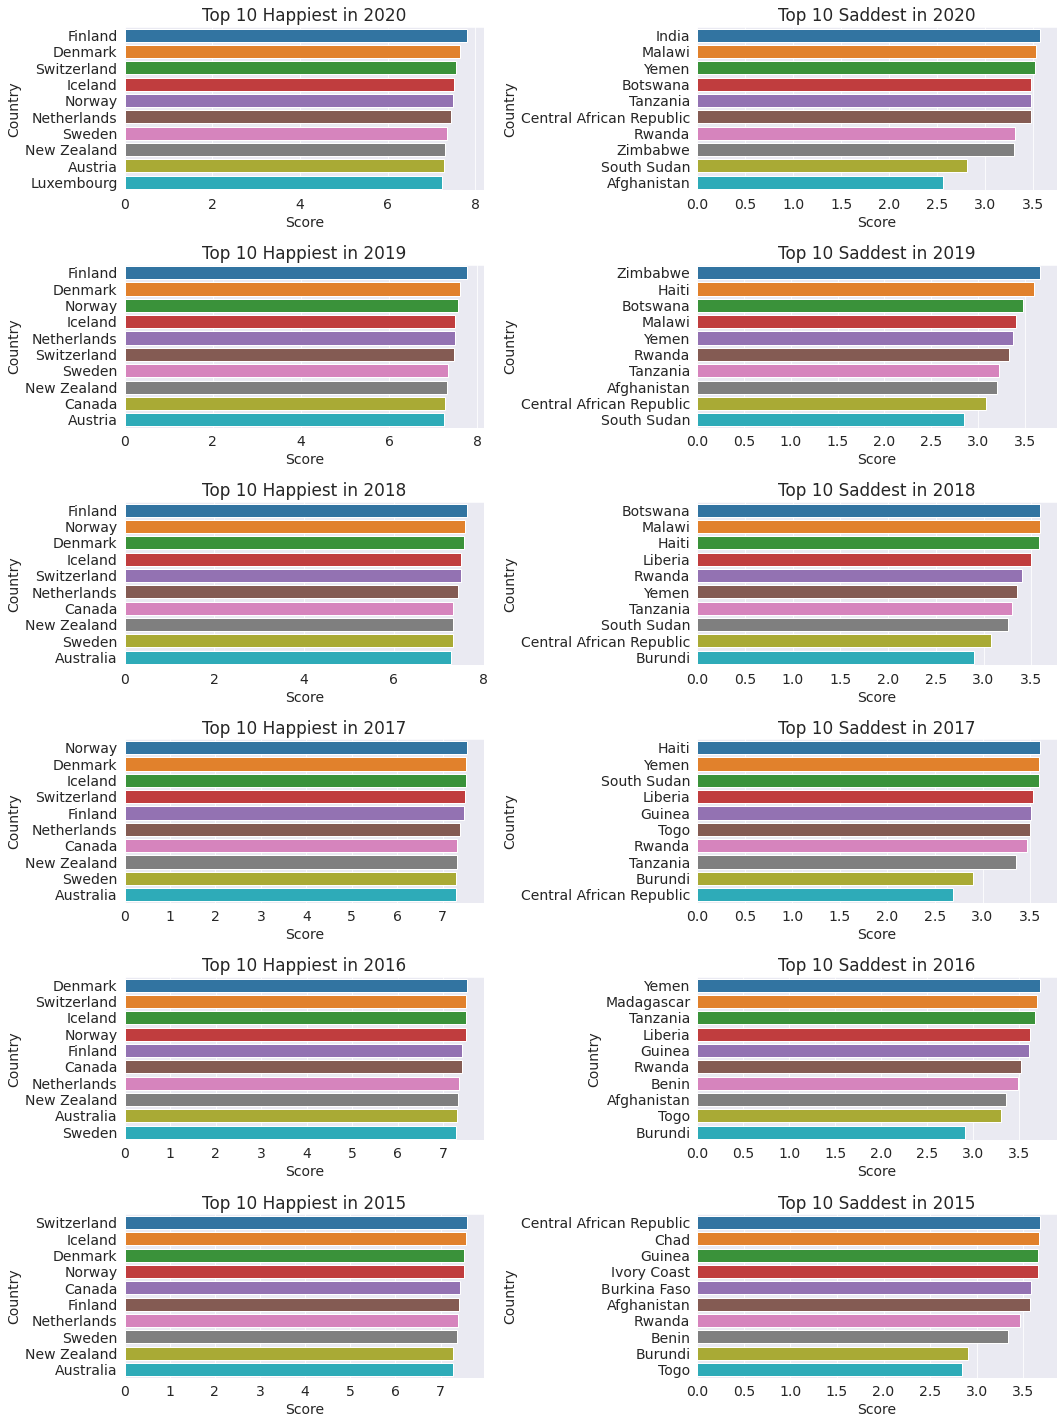

In [85]:
fig, axes = plt.subplots(6,2, figsize=(15,20))  # To plot multiple graph into single picture.


axes[0,0].set_title('Top 10 Happiest in 2020') #Setting title to the graph
p=sns.barplot(x=happy2020_df['Happiness Index'], y=happy2020_df['Country name'].head(10), ax=axes[0,0]) #seaborn function 
                                                                                                        #to plot bar graph
axes[0,0].set_xlabel('Score') #naming X axis
axes[0,0].set_ylabel('Country')#naming y axis

axes[0,1].set_title('Top 10 Saddest in 2020')
sns.barplot(x=happy2020_df['Happiness Index'], y=happy2020_df['Country name'].tail(10), ax=axes[0,1])
axes[0,1].set_ylabel('Country')
axes[0,1].set_xlabel('Score')

axes[1,0].set_title('Top 10 Happiest in 2019')
sns.barplot(x=happy2019_df['Happiness Index'], y=happy2019_df['Country name'].head(10), ax=axes[1,0])
axes[1,0].set_ylabel('Country')
axes[1,0].set_xlabel('Score')

axes[1,1].set_title('Top 10 Saddest in 2019')
sns.barplot(x=happy2019_df['Happiness Index'], y=happy2019_df['Country name'].tail(10), ax=axes[1,1])
axes[1,1].set_ylabel('Country')
axes[1,1].set_xlabel('Score')

axes[2,0].set_title('Top 10 Happiest in 2018')
sns.barplot(x=happy2018_df['Happiness Index'], y=happy2018_df['Country name'].head(10), ax=axes[2,0])
axes[2,0].set_ylabel('Country')
axes[2,0].set_xlabel('Score')

axes[2,1].set_title('Top 10 Saddest in 2018')
sns.barplot(x=happy2018_df['Happiness Index'], y=happy2018_df['Country name'].tail(10), ax=axes[2,1])
axes[2,1].set_ylabel('Country')
axes[2,1].set_xlabel('Score')

axes[3,0].set_title('Top 10 Happiest in 2017')
sns.barplot(x=happy2017_df['Happiness Index'], y=happy2017_df['Country name'].head(10), ax=axes[3,0])
axes[3,0].set_ylabel('Country')
axes[3,0].set_xlabel('Score')

axes[3,1].set_title('Top 10 Saddest in 2017')
sns.barplot(x=happy2017_df['Happiness Index'], y=happy2017_df['Country name'].tail(10), ax=axes[3,1])
axes[3,1].set_ylabel('Country')
axes[3,1].set_xlabel('Score')

axes[4,0].set_title('Top 10 Happiest in 2016')
sns.barplot(x=happy2016_df['Happiness Index'], y=happy2016_df['Country name'].head(10), ax=axes[4,0])
axes[4,0].set_ylabel('Country')
axes[4,0].set_xlabel('Score')

axes[4,1].set_title('Top 10 Saddest in 2016')
sns.barplot(x=happy2016_df['Happiness Index'], y=happy2016_df['Country name'].tail(10), ax=axes[4,1])
axes[4,1].set_ylabel('Country')
axes[4,1].set_xlabel('Score')

axes[5,0].set_title('Top 10 Happiest in 2015')
sns.barplot(x=happy2015_df['Happiness Index'], y=happy2015_df['Country name'].head(10), ax=axes[5,0])
axes[5,0].set_ylabel('Country')
axes[5,0].set_xlabel('Score')


axes[5,1].set_title('Top 10 Saddest in 2015')
sns.barplot(x=happy2015_df['Happiness Index'], y=happy2015_df['Country name'].tail(10), ax=axes[5,1])
axes[5,1].set_ylabel('Country')
axes[5,1].set_xlabel('Score')




fig.tight_layout()

- **It seems like countries like Denmark, Finland, Norway, New Zealand, Swizerland are consistently the happiest
  countries in the world.**
- **While Countries like Afganistan, Syria, Zimbabwe, Malawai, Central Africa Republic continue to be the saddest     countries.**
- **India is new entrant in the list of saddest countries in the world.**

## Scatter plot of happiness index

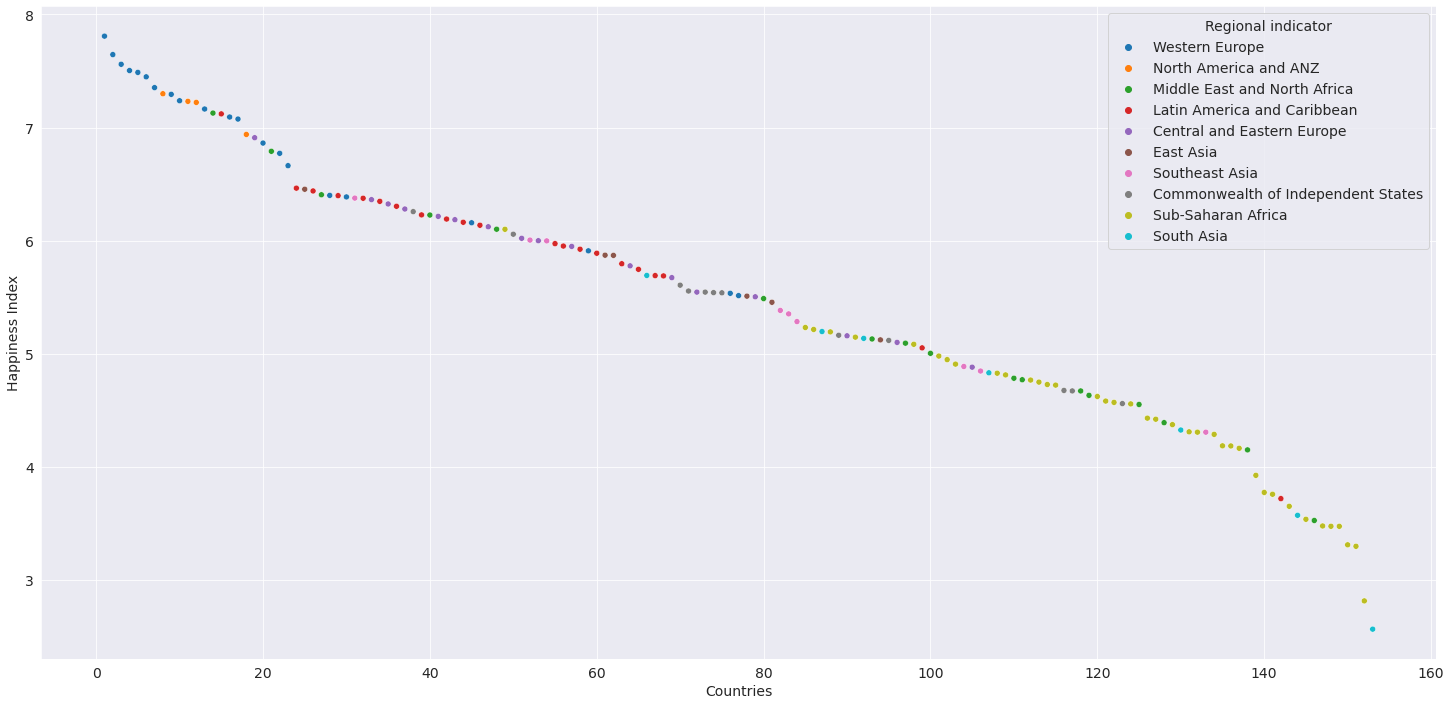

In [86]:
plt.figure(figsize=(25,12)) 
plt.xlabel('Countries')
sns.scatterplot(x='Rank', y='Happiness Index', data=happy2020_df, hue='Regional indicator');

-  **Here we see some kind of polarization as bunch of Western European countries are at the upper end while the other end has countries mostly from Sub-Saharan Africa.**


**Let's try to find how many Western European countries are above the happiness index 7 and Sub_Saharan countries below the index of 5.**

In [87]:
upper_df= happy2020_df.loc[happy2020_df['Happiness Index']>6.5][['Rank','Country name',
                                                                  'Happiness Index', 'Regional indicator']]
WesEup_num=upper_df[upper_df['Regional indicator']=="Western Europe"]["Regional indicator"].count()
WesEup_total=happy2020_df[happy2020_df['Regional indicator']=='Western Europe']['Regional indicator'].count()
WesEup_total
pct_WesEup= WesEup_num/WesEup_total*100
print('Percentage of countries in Western Europe that has happiness index  of 6.5 or above:', pct_WesEup, '.')


lower_df= happy2020_df.loc[happy2020_df['Happiness Index']<5][['Rank','Country name',
                                                                  'Happiness Index', 'Regional indicator']]
SubSah_num=lower_df[lower_df['Regional indicator']=="Sub-Saharan Africa"]["Regional indicator"].count()
SubSah_total=happy2020_df[happy2020_df['Regional indicator']=='Sub-Saharan Africa']['Regional indicator'].count()
SubSah_total
pct_SubSah= SubSah_num/SubSah_total*100
print('Percentage of countries in Sub-Saharan Africa that has happiness index  of 5 or below:', pct_SubSah, '.')

Percentage of countries in Western Europe that has happiness index  of 6.5 or above: 71.42857142857143 .
Percentage of countries in Sub-Saharan Africa that has happiness index  of 5 or below: 84.61538461538461 .


- **As it can be seen that percentage of countries at the two end of happiness indec is high.**
- **Almost more than 70% of the countries in Western Europe make have high happiness index while as high as 85% of the countries in Sub-Saharan Africa are at the bottom of happiness index.**
- **It shows the regional inequality of happiness overt these two polar end of the world.**

## Regional Happiness Index. 

### Happiness Index for 2020

In [88]:
regi_df=happy2020_df.groupby('Regional indicator')['Happiness Index'].mean().sort_values(ascending=False).to_frame()
regi_df=regi_df.reset_index()
regi_df

,Regional indicator,Happiness Index
0,North America and ANZ,7.173525
1,Western Europe,6.899219
2,Latin America and Caribbean,5.981786
3,Central and Eastern Europe,5.883818
4,East Asia,5.714850
5,Southeast Asia,5.383367
6,Commonwealth of Independent States,5.358342
7,Middle East and North Africa,5.227159
8,South Asia,4.475443
9,Sub-Saharan Africa,4.383495


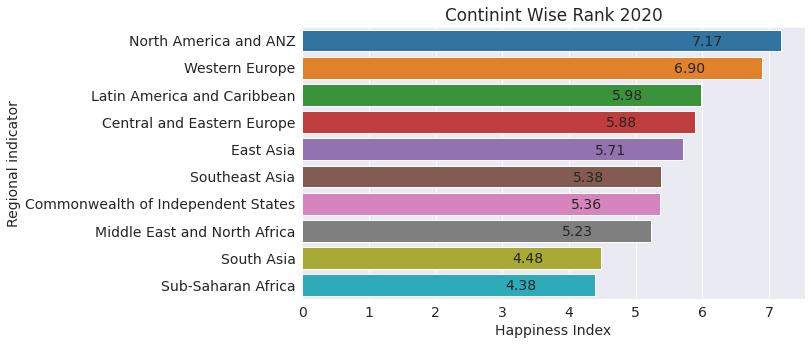

In [89]:
plt.title("Continint Wise Rank 2020")

temp=sns.barplot(y='Regional indicator', x='Happiness Index', data=regi_df);

    
    
for p in temp.patches:
    width = p.get_width()
    plt.text(-1.1+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')
     

### Happiness Index over last six year. 

In [90]:
regi_alldf=happy_df.groupby('Regional indicator')['Happiness Index'].mean().sort_values(ascending=False).to_frame()
regi_alldf=regi_alldf.reset_index()
regi_alldf

,Regional indicator,Happiness Index
0,North America and ANZ,7.224462
1,Western Europe,6.783005
2,Latin America and Caribbean,6.003480
3,Central and Eastern Europe,5.603712
4,East Asia,5.592893
5,Middle East and North Africa,5.351085
6,Southeast Asia,5.343402
7,Commonwealth of Independent States,5.279279
8,South Asia,4.487219
9,Sub-Saharan Africa,4.204756


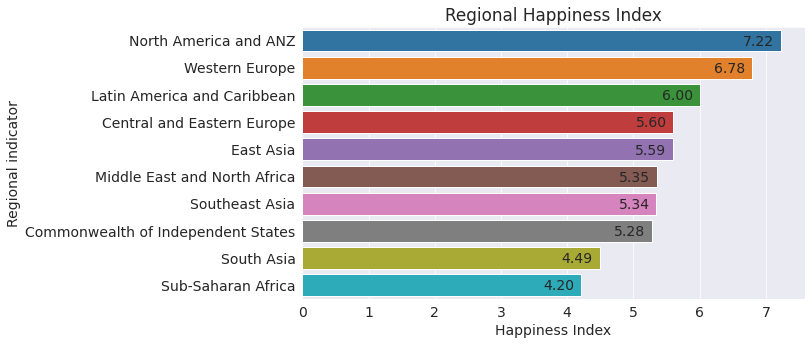

In [91]:
plt.title("Regional Happiness Index")

temp=sns.barplot(y='Regional indicator', x='Happiness Index', data=regi_alldf);
for p in temp.patches:
    width = p.get_width()
    plt.text(-0.1+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='right', va='center')

-  **Although almost all countries in top 10 are from Western Europe, but on an average countries in North            America and Australia score higher than average of Western Europe.**
- **It can be seen that North America/ANZ and Western Europe do fairly well as there Happiness Index 
    is as high as 7.**
-  **While countries in the region South Asia and Sub-Saharan Africa are the worst performer and are the
    saddest region in the world.**
- **If seen over the past few years the trend remains the same.**




## Comparision of happiness trend.
#### We compare index of best and worst performer and try to fifure out recent trend.

In [92]:
#Selecting top 5 countries.
country_top=happy2020_df['Country name'].head(5).unique().tolist()
country_top

['Finland', 'Denmark', 'Switzerland', 'Iceland', 'Norway']

In [93]:
#Defining a new dataframe containing details of top 5 countries.
top_df=happy_df[happy_df['Country name'].isin(country_top)][['Country name','Year','Happiness Index', 
                                                            'Logged GDP per capita','Social support',
                                                              'Generosity','Freedom Index',
                                                              'Life Expectancy']]
#top_df

In [94]:
# List of bottom 5 countries.
country_bot=happy2020_df['Country name'].tail(5).unique().tolist()

In [95]:
# Dataframe for bottom 5 countries.
bot_df=happy_df[happy_df['Country name'].isin(country_bot)][['Country name','Year','Happiness Index',
                                                            'Logged GDP per capita','Social support',
                                                              'Generosity','Freedom Index',
                                                              'Life Expectancy']]

In [96]:
all_country=country_top+country_bot   #Combining list of countries in top 5 and bottom 5
#all_country
new_df=pd.concat([top_df,bot_df]) #Addming the two dataframes. 
#new_df


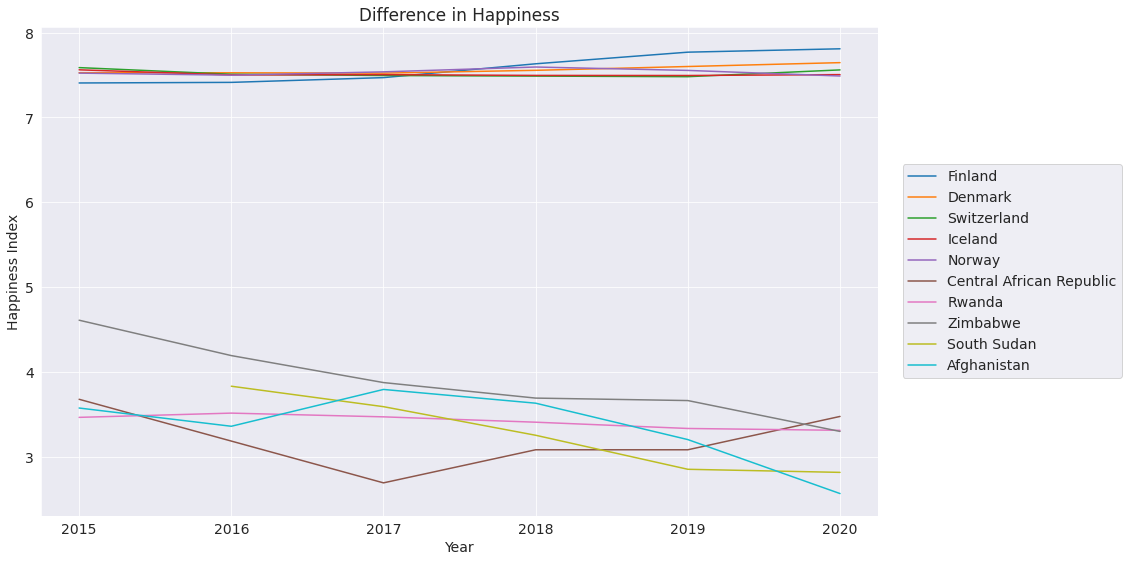

In [97]:
plt.figure(figsize=(15,9))
plt.title('Difference in Happiness')
plt.xlabel('Year')
plt.ylabel('Happiness Index')

# To avoid writing alot of functions we simply iterate over each country to plot the graph.
for countryy in all_country:
    plt.plot('Year', 'Happiness Index', data=new_df[new_df['Country name']==countryy])
    
plt.legend(all_country,loc='center right', bbox_to_anchor=(1.3,0.5)); 

- **It seems like there is wide difference among the best and worst performer.**
- **The top 5 countries are all concentrated in a narrow range of values while there is relatively
    some difference in happiness score of bottom 5 countries.**
- **Happiness Index of Zimbabwe, South Sudan and Afghanistan seems to be falling in recent years.**

### Comparing Happiness trend India with neighbouring countries. 

In [98]:
# List of countries in neighbouring
countries_neb= happy_df[happy_df['Regional indicator']=='South Asia']['Country name'].unique().tolist()
countries_neb=countries_neb + ['China']
#countries_neb=['India', 'Sri Lanka', 'China', 'Afghanistan', 'Nepal', 'Bangladesh','Pakistan','Finland']
neb_df=happy_df[happy_df['Country name'].isin(countries_neb)][['Country name', 'Happiness Index', 'Year',
                                                              'Logged GDP per capita','Social support',
                                                              'Generosity','Freedom Index',
                                                              'Life Expectancy']]
#neb_df

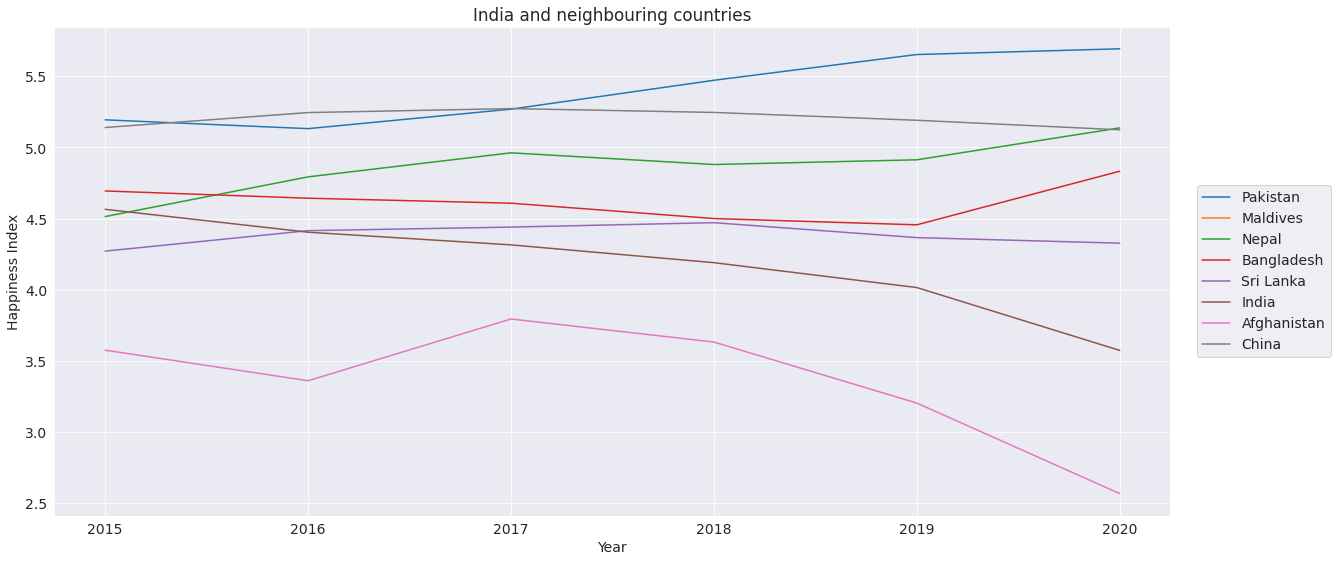

In [99]:
plt.figure(figsize=(20,9))  #To adjust dimension of graph
plt.title('India and neighbouring countries')  #Adds a title to the graph
plt.xlabel('Year')  #Name of X axis
plt.ylabel('Happiness Index')  #Name of Y axis

for country in countries_neb: #itteration over neighbouring countries
    plt.plot('Year','Happiness Index', data=neb_df[neb_df['Country name']==country])

plt.legend(countries_neb, loc='center right', bbox_to_anchor=(1.15,0.5)); #Countries-Color combination.

- **It can be seen that India is one of the worst performer among it's neighbouring countries after Afghanistan.**
- **While Pakistan is the top performer in the region.**
- **It can be seen that in recent years the Happiness Index has being falling for India**

In [100]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "ashish6552/eda-happiness-index" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/ashish6552/eda-happiness-index


'https://jovian.ai/ashish6552/eda-happiness-index'

## Trend in GDP per capita
### Lets see how it differe among top 5 and bottom 5 countries in Happiness index
- **GDP per capita is in logged form so that the difference between top and bottom can be reduced for feasible comparision**

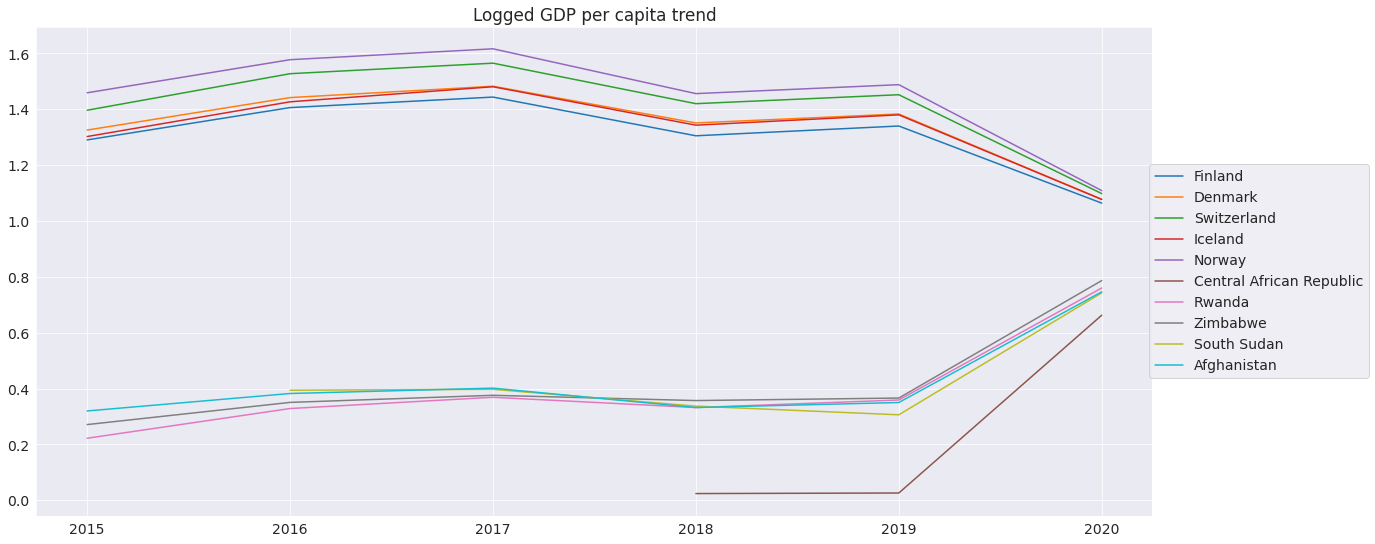

In [101]:
plt.figure(figsize=(20,9))
plt.title('Logged GDP per capita trend')
for country in (all_country):
    plt.plot('Year','Logged GDP per capita', data=new_df[new_df['Country name']==country])

plt.legend(all_country, loc='center right', bbox_to_anchor=(1.2,0.5));

- **There is a huge gap in GDP per capita between the best and worst performer on happiness index.**
- **It can be infered that GDP per capita of top performer is fairly constant while it's increasing marginally for the worse performer.**

## Trends in GDP per capital in South Asia.

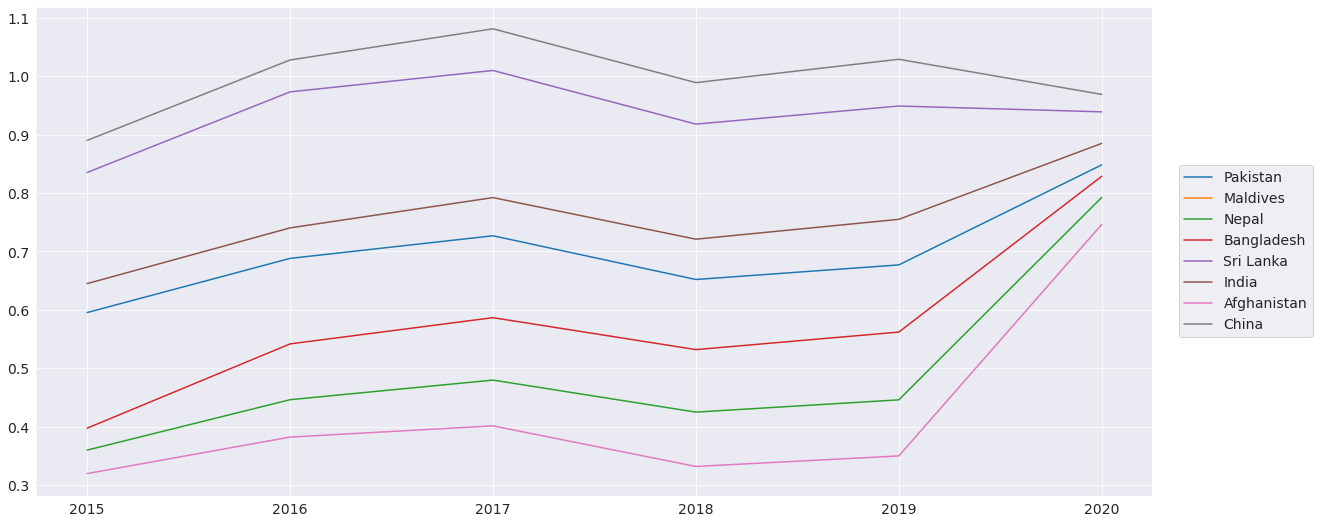

In [102]:
plt.figure(figsize=(20,9))
for country in (countries_neb):
    plt.plot('Year','Logged GDP per capita', data=neb_df[neb_df['Country name']==country])

plt.legend(countries_neb, loc='center right', bbox_to_anchor=(1.15,0.5));

- **India ranks 3rd in GDP per capita followed by China and Pakistan**
- **The country with lowest GDP per capita is Nepal and Afghanistan**

### Q1: What variables affects Happiness Index?
- **We measure pearson correlation for each variables to find degree of relationship between each variables**

### Interpretation of correlation value

In [103]:

corr_intpre= [['8-10', 'Very Strong'],
                ['6-8', 'Strong'],
                ['4-6', 'Moderate'],
                ['2-4', 'Weak'],
                ['0-2', 'Very Weak']]  #Will give output in series.
corr_intpre_df=pd.DataFrame(corr_intpre, columns=['Range of Correlaiton value', 'Intrepretation'])#Converting series into dataframe.
corr_intpre_df

,Range of Correlaiton value,Intrepretation
0,8-10,Very Strong
1,6-8,Strong
2,4-6,Moderate
3,2-4,Weak
4,0-2,Very Weak


#### Correlation based on past 5 years

In [104]:
#Dataframe containing data from 2015-2019
happy_past5_df=pd.concat([happy2019_df,happy2018_df, happy2017_df, happy2016_df,happy2015_df])
#happy_past5_df

In [105]:
# Computing correlation from 2015-2019
corr5=happy_past5_df[['Regional indicator',
       'Happiness Index', 'Logged GDP per capita', 'Social support',
       'Life Expectancy', 'Freedom Index', 'Generosity', 'Corruption Index',
       ]].corr()    #Corr() is pandas function to compute correlation among variable.

In [106]:
#computing correlation for 2020
corr=happy2020_df[['Regional indicator',
       'Happiness Index', 'Logged GDP per capita', 'Social support',
       'Life Expectancy', 'Freedom Index', 'Generosity', 'Corruption Index',
       ]].corr()

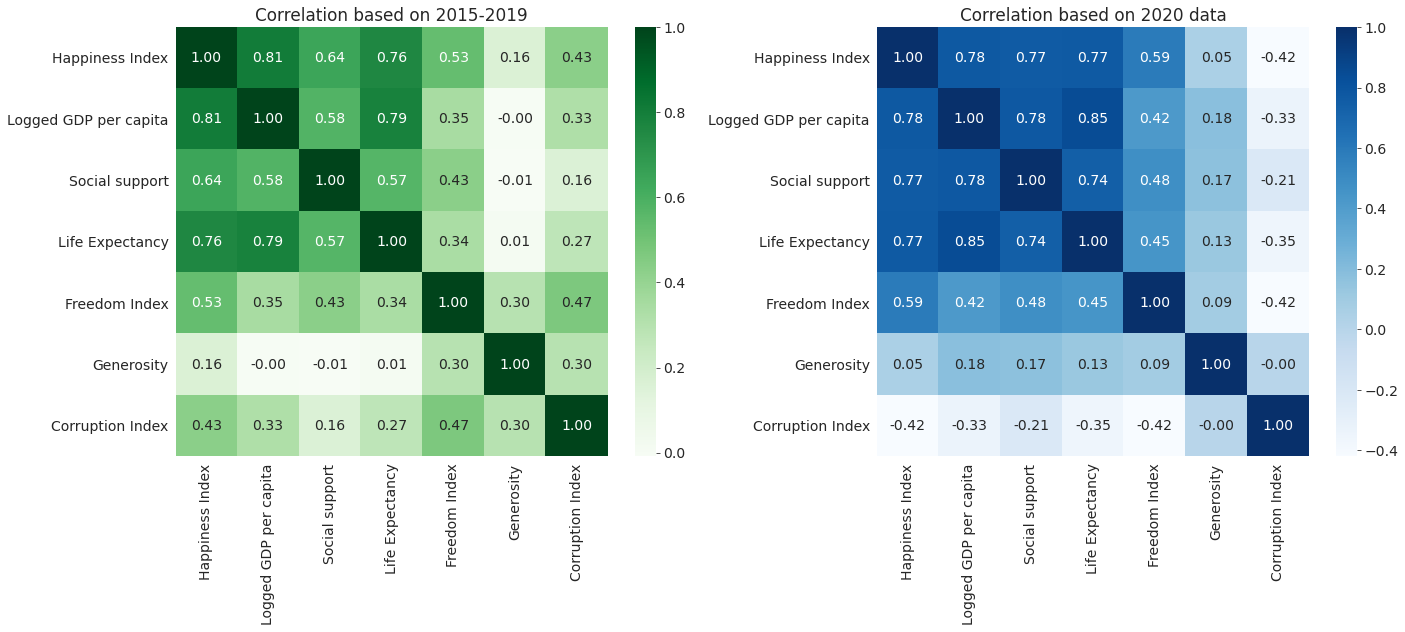

In [107]:

fig, axes = plt.subplots(1,2, figsize=(20,9))

axes[0].set_title('Correlation based on 2015-2019')
sns.heatmap(corr5, annot=True, fmt='.2f', cmap='Greens', ax=axes[0]);  
axes[1].set_title('Correlation based on 2020 data')
sns.heatmap(corr, annot=True, fmt='.2f', cmap='Blues', ax=axes[1]);

plt.tight_layout()

- **It can be infered Life expectancy, Social Security and GDP per capita have strong effect on Happiness Index.**
- **Social Security and Life Expectancy are highly related to GDP per capita implying that these variables improves as GDP of a nation grows.**
- **Freedom to express, Corruption and Generosity have fairly low impact on Happiness Index**
- **These inferences are true over the past years as well as on current year data.**

Let us save and upload our work to Jovian before continuing

In [108]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "ashish6552/eda-happiness-index" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/ashish6552/eda-happiness-index


'https://jovian.ai/ashish6552/eda-happiness-index'

### Q2: Which region contains most happiest and most unhappy country?

In [109]:
# Numner of countries in each region which are in top 25.
conti25=(happy2020_df['Regional indicator'].head(25).value_counts()).to_frame()
conti25
conti25.rename(columns={'Regional indicator' : 'Number'}, inplace=True)
conti25
#head() selects top 25 values from the database.
#value_count() it counts number of each input in a given dataset. 
# Here we are making a dataframe of top 25 countries in happiness index indexed w.r.t regional indicator.

,Number
Western Europe,15
North America and ANZ,4
Middle East and North Africa,2
Latin America and Caribbean,2
East Asia,1
Central and Eastern Europe,1


- **15 out of top 25 countries are from Western Europe.**

In [110]:
happy2020_df[['Regional indicator']].value_counts()

Regional indicator                
Sub-Saharan Africa                    39
Western Europe                        21
Latin America and Caribbean           21
Middle East and North Africa          17
Central and Eastern Europe            17
Commonwealth of Independent States    12
Southeast Asia                         9
South Asia                             7
East Asia                              6
North America and ANZ                  4
dtype: int64

In [111]:
# Dividing number of countries in top 25 in each region by total number of countries in each region to
# get percentage of countries in each region which makes into top 25
(happy2020_df[['Regional indicator']].head(25).value_counts()/happy2020_df[['Regional indicator']].value_counts()).sort_values(ascending=False)

Regional indicator                
North America and ANZ                 1.000000
Western Europe                        0.714286
East Asia                             0.166667
Middle East and North Africa          0.117647
Latin America and Caribbean           0.095238
Central and Eastern Europe            0.058824
Commonwealth of Independent States         NaN
South Asia                                 NaN
Southeast Asia                             NaN
Sub-Saharan Africa                         NaN
dtype: float64

- **All countries in North AMerica and ANZ are in top 25 while about 71% of the Western European countries are in top 25**

In [112]:
# It will take input as region and give output of countries in that region which are in top 25.
top25=happy2020_df[['Country name', 'Regional indicator', 'Happiness Index']].head(25)
again='Yes'
while again.upper()=='YES':
    inp=input('Enter the region for which you want the list of countries in top 25:')
    
    if inp in country_conti_df['Regional indicator'].unique():
        if inp in top25['Regional indicator'].unique():
            print(top25[top25['Regional indicator']==inp])
            again=input('Do you wan to try again(Yes or No): ')
                  
        else :
            print('No country from this region makes into top 25')
            again=input('Do you wan to try again(Yes or No): ')
    else: 
        print('Wrong Input.')
        again=input('Do you wan to try again(Yes or No): ')
    

Enter the region for which you want the list of countries in top 25:East Asia
                Country name Regional indicator  Happiness Index
24  Taiwan Province of China          East Asia           6.4554
Do you wan to try again(Yes or No): no


- **By entering the name of the region one can get names of countries which makes into top 25.**

In [113]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "ashish6552/eda-happiness-index" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/ashish6552/eda-happiness-index


'https://jovian.ai/ashish6552/eda-happiness-index'

In [114]:
# Computing number of countries in each region in bottom 50.
bot50=happy2020_df[['Regional indicator']].tail(50).value_counts().to_frame()
#bot50.rename(columns={'0' : 'Number'}, inplace=True)
bot50

,0
Regional indicator,
Sub-Saharan Africa,30
Middle East and North Africa,8
South Asia,4
Southeast Asia,3
Commonwealth of Independent States,3
Latin America and Caribbean,1
Central and Eastern Europe,1


- **Out of bottom 50, 30 countries are in Sub-Saharan Africa**

In [115]:
happy2020_df[['Regional indicator']].value_counts()

Regional indicator                
Sub-Saharan Africa                    39
Western Europe                        21
Latin America and Caribbean           21
Middle East and North Africa          17
Central and Eastern Europe            17
Commonwealth of Independent States    12
Southeast Asia                         9
South Asia                             7
East Asia                              6
North America and ANZ                  4
dtype: int64

In [116]:
# Computing percentage of countries in each region that makes into bottom 50.
(happy2020_df[['Regional indicator']].tail(50).value_counts()*100/
happy2020_df[['Regional indicator']].value_counts()).sort_values(ascending=False)

Regional indicator                
Sub-Saharan Africa                    76.923077
South Asia                            57.142857
Middle East and North Africa          47.058824
Southeast Asia                        33.333333
Commonwealth of Independent States    25.000000
Central and Eastern Europe             5.882353
Latin America and Caribbean            4.761905
East Asia                                   NaN
North America and ANZ                       NaN
Western Europe                              NaN
dtype: float64

- **Almost 77% of the countries in Sub-Sahara Africa and while 57% of South Asian countries are in bottom 50**

### Q3: What is the history of happiest country in each region?

In [117]:
conti_group_df=happy_df.groupby(['Regional indicator','Year'])[['Country name',
                                            'Happiness Index' ]].first()

In [118]:
conti_group_df #HIstory of Happiest countries in each region.

Country name  \
Regional indicator                 Year                             
Central and Eastern Europe         2015            Czech Republic   
                                   2016            Czech Republic   
                                   2017            Czech Republic   
                                   2018            Czech Republic   
                                   2019            Czech Republic   
                                   2020            Czech Republic   
Commonwealth of Independent States 2015                Uzbekistan   
                                   2016                Uzbekistan   
                                   2017                Uzbekistan   
                                   2018                Uzbekistan   
                                   2019                Uzbekistan   
                                   2020                Uzbekistan   
East Asia                          2015                     Japan   
                                   2016                     Japan   
                                   2017  Taiwan Province of China   
                                   2018                     Japan   
                                   2019               South Korea   
                                   2020  Taiwan Province of China   
Latin America and Caribbean        2015                Costa Rica   
                                   2016                Costa Rica   
                                   2017                Costa Rica   
                                   2018                Costa Rica   
                                   2019                Costa Rica   
                                   2020                Costa Rica   
Middle East and North Africa       2015                    Israel   
                                   2016                    Israel   
                                   2017                    Israel   
                                   2018                    Israel   
                                   2019                    Israel   
                                   2020                    Israel   
North America and ANZ              2015                    Canada   
                                   2016                    Canada   
                                   2017                    Canada   
                                   2018                    Canada   
                                   2019               New Zealand   
                                   2020               New Zealand   
South Asia                         2015                  Pakistan   
                                   2016                  Pakistan   
                                   2017                  Pakistan   
                                   2018                  Pakistan   
                                   2019                  Pakistan   
                                   2020                  Pakistan   
Southeast Asia                     2015                 Singapore   
                                   2016                 Singapore   
                                   2017                 Singapore   
                                   2018                 Singapore   
                                   2019                 Singapore   
                                   2020                 Singapore   
Sub-Saharan Africa                 2015                 Mauritius   
                                   2016                 Mauritius   
                                   2017                 Mauritius   
                                   2018                 Mauritius   
                                   2019                 Mauritius   
                                   2020                 Mauritius   
Western Europe                     2015               Switzerland   
                                   2016                   Denmark   
                                   2017            

In [119]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "ashish6552/eda-happiness-index" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/ashish6552/eda-happiness-index


'https://jovian.ai/ashish6552/eda-happiness-index'

### Q4: What's the GDP per capita inequality among regions?

In [120]:
#Compute mean of GDP per capita for each region.
gdp_conti_mean=happy_df.groupby('Regional indicator')[['Logged GDP per capita']].mean()
#gdp_conti_mean

In [121]:
# Compute standard deviaiton of GDP pe capita for each region.
gdp_conti_std=happy_df.groupby('Regional indicator')[['Logged GDP per capita']].std()
#gdp_conti_std

In [122]:
conti_mean_std= gdp_conti_mean.merge(gdp_conti_std, on='Regional indicator')
conti_mean_std.rename(columns={'Logged GDP per capita_x': 'GDP per capita mean',
                      'Logged GDP per capita_y': 'GDP per capita standard deviation'}, inplace=True)
conti_mean_std

,GDP per capita mean,GDP per capita standard deviation
Regional indicator,,
Central and Eastern Europe,1.098856,0.135096
Commonwealth of Independent States,0.885010,0.222316
East Asia,1.133641,0.184865
Latin America and Caribbean,0.931967,0.199437
Middle East and North Africa,1.066587,0.288885
North America and ANZ,1.336096,0.141152
South Asia,0.654934,0.210580
Southeast Asia,0.900700,0.318967
Sub-Saharan Africa,0.514410,0.296117


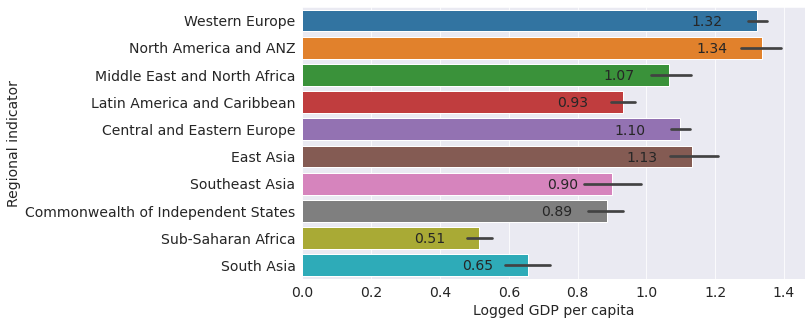

In [123]:
temp=sns.barplot(y='Regional indicator', x='Logged GDP per capita', data=happy_df);
for p in temp.patches:
    width = p.get_width()
    plt.text(-0.1+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='right', va='center')
     

- **Countries in Western Europe and North America and ANZ have highest GDP per capita while countries in South Asia and Sub-Saharan Africa are poor.**

In [124]:
conti_mean_std.sort_values(by='GDP per capita standard deviation', ascending=False)

,GDP per capita mean,GDP per capita standard deviation
Regional indicator,,
Southeast Asia,0.900700,0.318967
Sub-Saharan Africa,0.514410,0.296117
Middle East and North Africa,1.066587,0.288885
Commonwealth of Independent States,0.885010,0.222316
South Asia,0.654934,0.210580
Latin America and Caribbean,0.931967,0.199437
East Asia,1.133641,0.184865
Western Europe,1.321242,0.155748
North America and ANZ,1.336096,0.141152


- **In terms of GDP per capita Southeast Asia , Sub-Saharan Africa and Middle East and North Africa are the most unequal region in the world.**

### Q5: Why India's Happiness Index has been declining?

In [125]:
india_df=happy_df[happy_df['Country name']=='India']
india_df

,index,Rank,Country name,Regional indicator,Happiness Index,Logged GDP per capita,Social support,Life Expectancy,Freedom Index,Generosity,Corruption Index,Year
143,143,144.0,India,South Asia,3.5733,0.884982,0.592201,60.215187,0.881445,0.057552,0.772043,2020
284,131,140.0,India,South Asia,4.0150,0.755000,0.765000,0.588000,0.498000,0.200000,0.085000,2019
424,124,133.0,India,South Asia,4.1900,0.721000,0.747000,0.485000,0.539000,0.172000,0.093000,2018
561,116,122.0,India,South Asia,4.3150,0.792221,0.754373,0.455428,0.469987,0.231538,0.092227,2017
700,108,118.0,India,South Asia,4.4040,0.740360,0.292470,0.450910,0.402850,0.250280,0.087220,2016
846,109,117.0,India,South Asia,4.5650,0.644990,0.381740,0.515290,0.397860,0.264750,0.084920,2015


In [126]:
india_df[['Year', 'Rank','Happiness Index']]

,Year,Rank,Happiness Index
143,2020,144.0,3.5733
284,2019,140.0,4.0150
424,2018,133.0,4.1900
561,2017,122.0,4.3150
700,2016,118.0,4.4040
846,2015,117.0,4.5650


- **Over the past few years happiness index has been declining which has caused detoriation in rank from 117 to 144**

In [127]:
year_gdp=india_df[['Year', 'Logged GDP per capita']]

<AxesSubplot:xlabel='Year', ylabel='Freedom Index'>

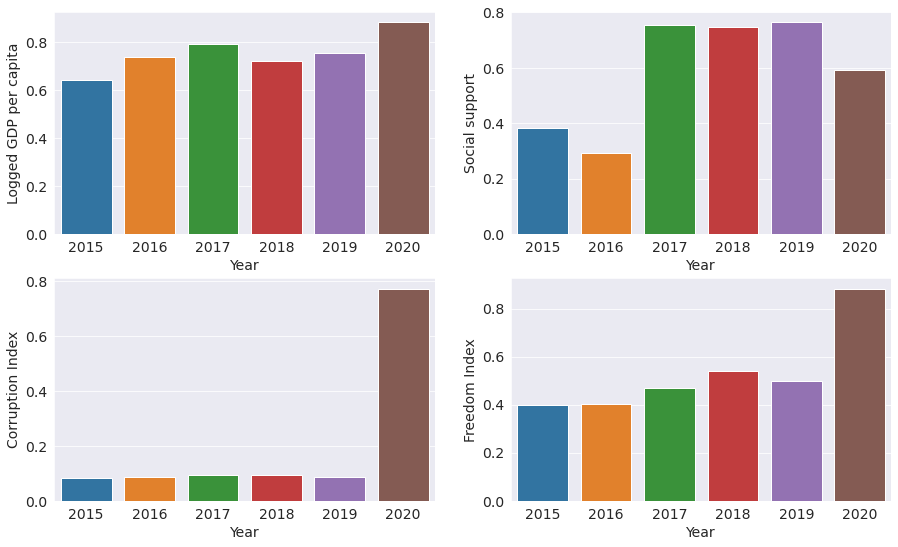

In [128]:
fig, axes = plt.subplots(2,2, figsize=(15,9))

sns.barplot(x=india_df['Year'], y=india_df['Logged GDP per capita'],ax=axes[0,0])

sns.barplot(x=india_df['Year'], y=india_df['Social support'],ax=axes[0,1])

sns.barplot(x=india_df['Year'], y=india_df['Corruption Index'],ax=axes[1,0])

sns.barplot(x=india_df['Year'], y=india_df['Freedom Index'],ax=axes[1,1])

###### Reasons for declining happiness index over years.
- **As compared the past year social support has declined significantly in 2020.**
- **Curroption index has increased as compared to last year.**


In [129]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "ashish6552/eda-happiness-index" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/ashish6552/eda-happiness-index


'https://jovian.ai/ashish6552/eda-happiness-index'

## Inferences and Conclusion

- **West European contries continues to be the happiest contries whhile Sub-Saharan African countries are the worst performer.**
- **North American Countries are among the richest while Sub-Saharan and South Asian countries continue to be the poorest country in the world.**
- **India's rank happiness index has been declining over time as social security and corruption index detoriates.**
- **Among South Asian countries India is one of the most unhappiest country after war torn Afghanistan.**
- **It can be said that Happiness Index is most affected by GDP per capita, Social Security and Life Expectancy. Therefore, a country may pursue a policy of improving these parameters to increase happiness of it's population.**

In [130]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "ashish6552/eda-happiness-index" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/ashish6552/eda-happiness-index


'https://jovian.ai/ashish6552/eda-happiness-index'

### Future Work

- **UN formulates happiness index on the basis of few parameter which are relevent in determining happiness of individual but to only say that these parameters are sufficient will not do justice to citizen of the country.**
- **As a suggestion other parameters such as relative poverty(not absolute poverty), level of employment, health care facilities, type of employment, population density also impact on happiness on individual level.**
- **By formulating these variables and including them in calculating by assigning them relevent weights(which might differ from country to country), a better index can be computed.**


### References
-  https://jovian.ai/learn/data-analysis-with-python-zero-to-pandas
-  https://www.w3schools.com/python/numpy/numpy_intro.asp
-  https://stackoverflow.com/
-  https://www.pythonsheets.com/
-  https://github.com/JovianML/opendatasets
-  https://www.kaggle.com/mathurinache/world-happiness-report

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
